CA-63
The variable 'L_denoised' does not exist in the .mat file for epoch 'preOP_epoch'
The variable 'L_raw' does not exist in the .mat file for epoch 'preOP_epoch'
The variable 'Index_tt' does not exist in the .mat file for epoch 'preExtube'
The variable 'L_denoised' does not exist in the .mat file for epoch 'PACU_epoch'
The variable 'L_raw' does not exist in the .mat file for epoch 'PACU_epoch'
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(


Error in calculating the regression line parameters


c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be

Error in calculating the regression line parameters


D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\anal

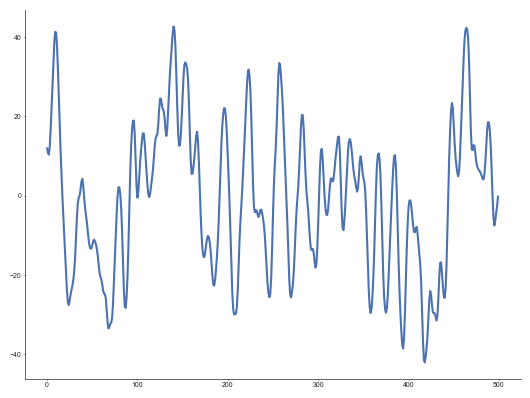

In [6]:
# %%
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import scipy.io
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle


from src.eeg_analysis.preprocessing.eeg_file import EEGFile
from src.eeg_analysis.preprocessing.eeg_preprocessor import EEGPreprocessor
from src.eeg_analysis.analysis.power_spectral import PowerSpectralAnalysis
from src.eeg_analysis.visualization.plots import plot_continuous_epochs
from src.eeg_analysis.visualization.my_custom_style import set_custom_style

# %%
dataset_dir = 'E:/Caffeine_data'
participant_names = [f'CA-{id:02}' for id in range(63, 64)] 

# fbands = {
#     'delta': [0.5, 4],
#     'theta': [4, 7],
#     'alpha':[7, 16],
#     'beta': [16, 35],
#     'gamma':[35, 55]
# }
fbands={
    'delta': [0, 4],
    'theta': [4, 7],
    'alpha':[7, 20],
    'beta': [20, 35],
    'gamma':[35, 55]
}

# %%
def get_eeg_file(dataset_dir=None, participant_name=None):

    if (dataset_dir is not None) & (participant_name is not None):
        eeg_path = Path(f'{dataset_dir}/{participant_name}/{participant_name}').with_suffix('.eeg')
    else: 
        # Create a Tkinter root window (it will not be shown)
        root = tk.Tk()
        root.withdraw()
        
        # Set the file dialog to appear in front
        root.attributes('-topmost', True)

        # Ask the user to select a .eeg file
        eeg_file_path = filedialog.askopenfilename(title="Select EEG File", filetypes=[("EEG files", "*.eeg")])
        if not eeg_file_path:
            raise FileNotFoundError("No file selected.")
        
        # Convert to Path object for easier manipulation
        eeg_path = Path(eeg_file_path)
    
    base_path = eeg_path.with_suffix('')
    base_dir = eeg_path.parent
    
    # Extract participant ID (assuming filename is `CA-XX.eeg`)
    participant_name = base_path.name
    participant_id = int(participant_name.split('-')[1])  # Adjust this if your file naming convention is different
    
    # Generate paths for the corresponding files
    vhdr_path = base_path.with_suffix('.vhdr')
    vmrk_path = base_path.with_suffix('.vmrk')

    return participant_id, base_dir, vhdr_path, vmrk_path, eeg_path

for participant_name in participant_names:
    
    print(participant_name)

    try:
        participant_id, base_dir, vhdr_path, vmrk_path, eeg_path = get_eeg_file(dataset_dir, participant_name)

        # Make a directory for analysis results
        base_results_dir = base_dir / 'analysis_results_v2'
        if not base_results_dir.exists():
            base_results_dir.mkdir(parents=True, exist_ok=True)

        eeg_file = EEGFile(participant_id, str(vhdr_path), str(vmrk_path), str(eeg_path))
        eeg_file.read_vhdr()

        # %% [markdown]
        # ##### Load preprocessed .mat EEG data

        # %%
        def load_mat_file(participant_id, epoch, variables, all_channel_names):

            base_dir = Path(r'D:/Anesthesia_Research_Fellow/preprocessed_EEG_by_DuanLI')
            base_filename = f'CA_{participant_id:02}_{epoch}_denoised.mat'
            file_path = base_dir / base_filename

            # Check if the file exists
            if not file_path.exists():
                raise FileNotFoundError(f"The file {file_path} does not exist")

            # Load .mat file
            mat_data = scipy.io.loadmat(file_path)

            # Access the variables
            data={}
            for variable in variables:
                if variable in mat_data:
                    curr_variable = mat_data[variable]
                    if variable in ['zz_epoch', 'zz_noise']:
                        data[variable] = np.transpose(curr_variable, [1, 0])
                    elif variable in ['channels_remained', 'Index_tt']:
                        data[variable] = curr_variable.flatten() - 1 # Due to Python zero-indexing
                    elif variable in ['fs', 'L_raw', 'L_denoised']:
                        data[variable] = curr_variable.flatten()[0]
                    else:
                        data[variable] = curr_variable.flatten()
                else:
                    print(f"The variable '{variable}' does not exist in the .mat file for epoch '{epoch}'")
            return data

        # Example for loading different epochs for participant_id = 1
        epoch_names = ['preOP_epoch', 'preExtube', 'PACU_epoch']
        new_epoch_names = {
            'preOP_epoch': 'preop_rest',
            'preExtube': 'emergence',
            'PACU_epoch': 'pacu_rest'
        }
        variables = ['channels_remained', 'fs', 'L_denoised', 'L_raw', 'tt', 'Index_tt', 'zz_epoch', 'zz_noise']
        all_channel_names = eeg_file.channel_names

        epoch_data = {}
        for epoch_name in epoch_names:
            try:
                epoch_data[new_epoch_names[epoch_name]] = load_mat_file(participant_id, epoch_name, variables, all_channel_names)
                
                # Process the loaded data as needed
            except FileNotFoundError as e:
                print(e)


        # %% [markdown]
        # #### Zero padding the eeg data, so the time dimension is linear (with no missing point)

        # %%
        total_num_eeg_channels = 16

        epoch_names = list(epoch_data.keys())
        for epoch_name in epoch_names:
            if epoch_name == 'emergence':
                curr_epoch_data = epoch_data[epoch_name]
                tt = curr_epoch_data['tt']
                min_tt = np.min(tt)
                max_tt = np.max(tt)
                
                complete_time_range = np.arange(min_tt, max_tt + 1)
                time_indices = tt - min_tt  # These are the positions where `tt` values should go

                # Preallocate zero-padded EEG data arrays
                for eeg_data_name in ['zz_epoch', 'zz_noise']:
                    curr_eeg_data = curr_epoch_data[eeg_data_name]
                    zero_padded_eeg = np.zeros((len(complete_time_range), curr_eeg_data.shape[1]))

                    # Utilize NumPy indexing to fill in the non-zero data
                    zero_padded_eeg[time_indices] = curr_eeg_data

                    epoch_data[epoch_name][eeg_data_name] = zero_padded_eeg

                epoch_data[epoch_name]['tt'] = complete_time_range

            else:
                epoch_data[epoch_name]['tt'] = epoch_data[epoch_name]['Index_tt']
                del epoch_data[epoch_name]['Index_tt']


            curr_epoch_data = epoch_data[epoch_name]
            curr_channels_remained = curr_epoch_data['channels_remained']
            for eeg_data_name in ['zz_epoch']: #, 'zz_noise'
                zero_padded_channels = np.zeros((curr_epoch_data['zz_epoch'].shape[0], total_num_eeg_channels))

                for i_chan, chan in enumerate(curr_channels_remained):
                    zero_padded_channels[:, chan] = curr_epoch_data[eeg_data_name][:, i_chan]

                epoch_data[epoch_name][eeg_data_name] = zero_padded_channels

            epoch_data[epoch_name]['eliminated_channels'] = [i for i in range(total_num_eeg_channels) if i not in curr_channels_remained.tolist()]
            del epoch_data[epoch_name]['channels_remained']

        # %%
        plt.figure()
        plt.plot(epoch_data['emergence']['zz_epoch'][:500, 6]) # epoch_data['emergence']['zz_epoch']

        # %% [markdown]
        # #### Generate .eeg file from the imported data for visualizing the eeg using Neuroscope

        # %%
        # epoch_name = 'emergence'
        # eeg_data = epoch_data[epoch_name]['zz_epoch']

        # sampling_rate = epoch_data[epoch_name]['fs']

        # sufffix = f'_{epoch_name}'
        # eeg_int = EEGPreprocessor.convert_to_neuroscope_eeg(eeg_data, sampling_rate, eeg_path, sufffix)

        # %% [markdown]
        # ##### Modify the eeg_file object using the preprocessed data

        # %%
        epoch_names = epoch_data.keys()

        eeg_data = {}
        for epoch_name in epoch_names:
            eeg_data[epoch_name] = epoch_data[epoch_name]['zz_epoch']

        eeg_file.eeg_data = eeg_data
        eeg_file.sampling_frequency = epoch_data[epoch_name]['fs'] 

    
        # %% [markdown]
        # ### Note that the 'emergence' epoch now defined as 10 minutes prior to drug infusion until the extubation 
        # eeg_file.eeg_data['emergence'] = eeg_file.eeg_data['emergence'][:150000 ,:]
        # %%
        power_spectral = PowerSpectralAnalysis(eeg_file, step_size=0.1) 

        select_epochs = ['preop_rest', 'emergence', 'pacu_rest']
        power_spectral.calculate_time_frequency_map(select_channels = None, select_epochs=select_epochs, method='multitaper')

        # %%
        set_custom_style()

        epochs_to_include = ['emergence']
        # Create a new dictionary with only the specified epochs
        tfr_to_plot = {key: value for key, value in power_spectral.tfr.items() if key in epochs_to_include}

        start_time = 0
        end_time = 0
        for _, tfr in tfr_to_plot.items():
            end_time = end_time + tfr.times[-1]

        # Plotting for all 16 channels
        channels_to_plot = list(range(16))
        chan_names = power_spectral.select_channel_names
        num_channels = len(channels_to_plot)

        group_names = list(power_spectral.channel_groups.keys())
        num_groups = len(group_names)

        # Define single-column or double_column width figure
        fig_width = 450 # Adjusted to fit the 6x3 subplot grid
        fig_height = 300 # Adjusted to fit the 6x3 subplot grid

        font_size = 6

        fig = plt.figure()
        fig.set_size_inches([fig_width/72, fig_height/72])
        gs = GridSpec(
            nrows=6, 
            ncols=4, 
            figure=fig, 
            wspace = 0.4, 
            hspace = 0.4,
            width_ratios=[1,1,1,0.05]
        )

        for i_region, region_name in enumerate(group_names):
            region_channels_indices = [chan_names.index(name) for name in chan_names if name in power_spectral.channel_groups[region_name]]
            for i_channel, channel_idx in enumerate(region_channels_indices):
                row = i_region
                col = i_channel
                ax = fig.add_subplot(gs[row, col])

                im = plot_continuous_epochs(tfr_to_plot, ax = ax, colorbar=False, vmin=0, vmax=50, channel = channel_idx, cmap = 'inferno') # vmin=0, vmax = 50 

                if row == 5:  # Label x-axis on the bottom row
                    ax.set_xlabel('Time (s)')
                else:
                    ax.set_xticklabels([])
                
                ax.set_xticks(np.arange(0, end_time, 1000))
                ax.set_yticks(np.arange(0, 55, 10))
                ax.set_ylabel('Frequency (Hz)', labelpad=0.5)
                ax.set_title(chan_names[channel_idx], pad = 0.5, loc='left')
                ax.tick_params(axis='both', which='major', labelsize=5, length=2, width=0.5, pad=1)

        # Add colorbar
        cax = fig.add_subplot(gs[0, -1])
        cbar = plt.colorbar(im, cax=cax, orientation='vertical')
        cbar.set_label('Power(dB)', fontsize=5)
        cbar.outline.set_visible(False)
        cbar.ax.tick_params(labelsize=5)

        plt.subplots_adjust(left=0.1, right= 0.9, bottom=0.1, top=0.9)

        # Save plot
        base_results_filename = base_results_dir / f'CA-{participant_id:02}'
        filename = f'{base_results_filename}_tfrs_preprocessed_better_resolution.pdf'
        file_path = os.path.join(base_results_dir, filename)
        plt.savefig(file_path, format='pdf', dpi=300)

        # plt.show()
        plt.close()

        # %%
        power_spectral.postprocess_anatomical_region_average()

        # %%
        window_size = 120
        step_size = 60

        power_spectral.postprocess_time_window_average(window_size=window_size, step_size=step_size, attr_name='region_average_tfr')

        # %% [markdown]
        # ##### Calculate FOOOF parameters

        # %%
        # power_spectral.postprocess_aperiodic_paramaters(attr_name='window_average_tfr')

        # %%
        # initial_fbands = {
        #     'delta': [0.5, 4],
        #     'theta': [4, 7],
        #     'alpha':[7, 14],
        #     'beta': [18, 35],
        #     'gamma':[35, 55]
        # }

        # power_spectral.postprocess_periodic_parameters(attr_name='window_average_tfr', aperiodic_mode='knee', fbands=initial_fbands, peak_threshold=0.1, overlap_threshold=0.5)

        # %% [markdown]
        # ##### Calculate the aperiodic slope by estimating the slope of the aperiodic component in its linear regime using FOOOF, with the aperiodic mode set to 'knee'
        # 
        # The following code snippet needs to be integrated into the power_spectral.py 

        # %%
        # aperiodic_fit = power_spectral.fooof_aperiodic_fit['prefrontal']['emergence']
        # num_time_points = len(aperiodic_fit)
        # freqs = power_spectral.frequencies
        # idx = np.where(freqs > 10)[0]
        # slope = np.full((num_time_points,), np.nan)

        # for pnt in range(num_time_points):
        #     s, _ = np.polyfit(freqs[idx], 10*aperiodic_fit[(0, pnt)][idx], 1)
        #     slope[pnt] = -s

        # plt.figure()
        # plt.plot(slope)
        # plt.tick_params(labelsize=10)
        # # plt.ylim([0.01, 0.08])


            
        # # plot an example aperiodic fit 
        # example_aperiodic_fit = 10 ** (aperiodic_fit)
        # diff_aperiodic_fit = np.diff(aperiodic_fit)


        # plt.figure()
        # # plt.plot(freqs[1:], diff_aperiodic_fit)
        # plt.plot(freqs, aperiodic_fit)
        # # plt.plot(np.log10(freqs), aperiodic_fit)
        # plt.tick_params(labelsize=10)


        # %%
        power_spectral.postprocess_frequency_domain_whitening(attr_name='region_average_tfr', fbands=fbands)


        # %%
        region_average_tfr = power_spectral.whitened_tfr
        num_regions = len(region_average_tfr)

        set_custom_style()
        epochs_to_include = ['emergence']
        # Create a new dictionary with only the specified epochs
        tfr_to_plot = {key: value for key, value in power_spectral.tfr.items() if key in epochs_to_include}
        select_epochs = ['emergence']

        # freq_bands = power_spectral.fooof_periodic_parameters['prefrontal'][select_epochs[0]].keys()

        # Define single-column or double_column width figure
        fig_width = 200 # Adjusted to fit the 6x3 subplot grid
        fig_height = 300 # Adjusted to fit the 6x3 subplot grid

        font_size = 6

        fig = plt.figure()
        fig.set_size_inches([fig_width/72, fig_height/72])
        gs = GridSpec(
            nrows=6, 
            ncols=2, 
            figure=fig, 
            wspace = 0.4, 
            hspace = 0.4,
            width_ratios=[1,0.05]
        )

        region_count = 0
        for region, tfr in region_average_tfr.items(): # region_average_tfr
            ax = fig.add_subplot(gs[region_count, 0])
            im = plot_continuous_epochs(tfr, ax=ax, colorbar=False, vmin=-5, vmax=10, cmap='inferno', title=region) 

            if region == list(region_average_tfr.keys())[-1]:
                ax.set_xlabel('Time (s)')
            else:
                ax.set_xticklabels([])
                
            ax.set_ylabel('Frequency (Hz)')
            ax.set_title(region.capitalize(), pad = 0.5, loc='left')

            
            # for band in freq_bands:
            start_shift = 0
            for epoch in select_epochs:
                window_centers = start_shift + power_spectral.window_average_tfr[region][epoch].times

                # freq_band_info = power_spectral.fooof_periodic_parameters[region][epoch][band]
                # cf = freq_band_info['cf'][0]
                # lower_bound = freq_band_info['lower_bound'][0]
                # upper_bound = freq_band_info['upper_bound'][0]
                
                # # ax.plot(window_centers, cf, linestyle='-', linewidth=0.2, color='w')
                # # ax.plot(window_centers, lower_bound, linestyle=':', linewidth=0.2, color='w')  # Dotted line style
                # # ax.plot(window_centers, upper_bound, linestyle=':', linewidth=0.2, color='w')  # Dotted line style

                start_shift += power_spectral.tfr[epoch].times[-1]

            ax.set_xticks(range(0, int(window_centers[-1]), 1000))
            ax.tick_params(axis='both', which='major', labelsize=5, length=2, width=0.5, pad=1)

            ax.set_ylim([0, 55])
            ax.set_yticks(range(0, 55, 10))
            region_count += 1

        # Add colorbar
        cax = fig.add_subplot(gs[0, -1])
        cbar = plt.colorbar(im, cax=cax, orientation='vertical')
        cbar.set_label('Power (dB)', fontsize=5)
        cbar.outline.set_visible(False)
        cbar.ax.tick_params(labelsize=5)

        plt.subplots_adjust(left=0.2, right= 0.8, bottom=0.1, top=0.9)

        # Save plot
        base_results_filename = base_results_dir / f'CA-{participant_id:02}'
        filename = f'{base_results_filename}_tfrs_region_averages_preprocessed_better_resolution.pdf'
        file_path = os.path.join(base_results_dir, filename)
        plt.savefig(file_path, format='pdf', dpi=300)

        # plt.show()
        plt.close()

        # %%
        import pickle
        base_results_filename = base_results_dir / f'CA-{participant_id:02}'
        filename = f'{base_results_filename}_power_spectral_wider_alpha_band'
        file_path = os.path.join(base_results_dir, filename)

        with open(f"{file_path}.pkl", "wb") as file:
            pickle.dump(power_spectral, file)

    except:
        Warning(f'No data directory exists for participant {participant_name} or the calculation failed due to an error')


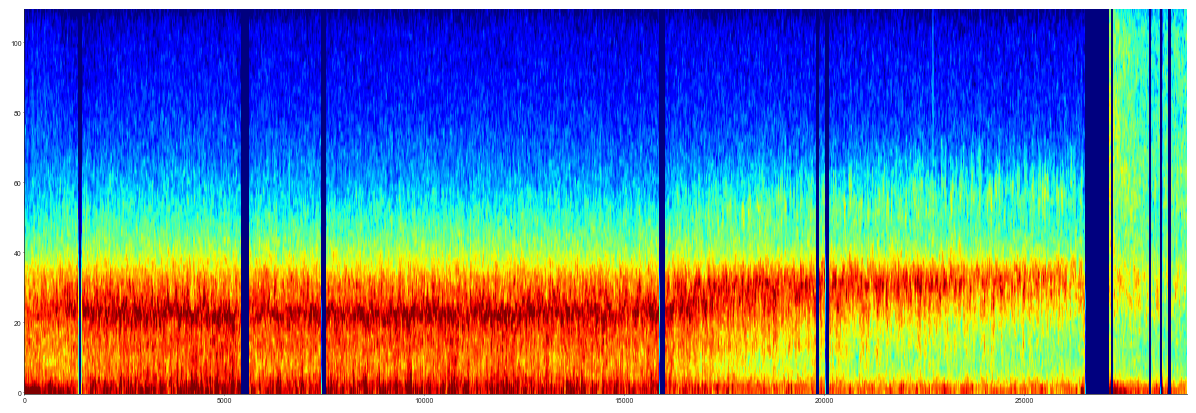

In [7]:
plt.figure(figsize=(15, 5))
plt.imshow(10*np.log10(power_spectral.region_average_tfr['prefrontal']['emergence'].data), aspect='auto', cmap='jet', vmin=5, vmax=45, origin='lower')

In [8]:
import pickle
base_results_filename = base_results_dir / f'CA-{participant_id:02}'
filename = f'{base_results_filename}_power_spectral_wider_alpha_band'
file_path = os.path.join(base_results_dir, filename)

with open(f"{file_path}.pkl", "wb") as file:
    pickle.dump(power_spectral, file)

In [9]:
power_spectral.postprocess_frequency_domain_whitening(attr_name='region_average_tfr', fbands=fbands)

D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(


Error in calculating the regression line parameters


c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be

Error in calculating the regression line parameters


D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\analysis\power_spectral.py:394: RankWarning: Polyfit may be poorly conditioned
  self.reg_fit_slope[win_idx, 0], self.reg_fit_intercept[win_idx, 0] = np.polyfit(
D:\capachinos\src\eeg_analysis\anal

In [10]:
power_spectral.fooof_periodic_parameters['parietal']['emergence']['alpha']['amplitude'][0]

array([0.35648897, 0.38728126, 0.38995913, 0.42872932, 0.42627876,
       0.38595627, 0.38260847, 0.37185303, 0.35377891, 0.37502674,
       0.38356743, 0.3843677 , 0.40007124, 0.38533551, 0.35024518,
       0.34120368, 0.32837223, 0.32959207, 0.35154322, 0.35791909,
       0.3387225 , 0.3660933 , 0.36191988, 0.34846165, 0.34932669,
       0.39035706, 0.40249808, 0.43814742, 0.45753862, 0.46020509,
       0.47639042, 0.5080394 , 0.55176871, 0.52876138, 0.56648137,
       0.5219581 , 0.57097997, 0.59255142, 0.50838813, 0.52090515,
       0.5396556 , 0.50305718, 0.50063026, 0.47441632, 0.31609596,
       0.33811647, 0.40097936])

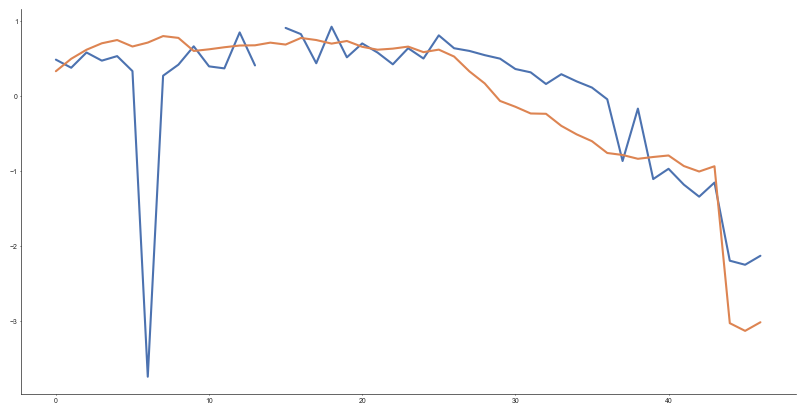

In [11]:
plt.figure(figsize=(10, 5))
reg_slope = -power_spectral.regresssion_ap_fit_slope['prefrontal']['emergence']
reg_slope = (reg_slope-np.nanmean(reg_slope))/np.nanstd(reg_slope)
plt.plot(reg_slope)

# plt.plot(
#     power_spectral.fooof_periodic_parameters['prefrontal']['emergence']['delta']['cf'][0],
#     power_spectral.fooof_periodic_parameters['prefrontal']['emergence']['delta']['amplitude'][0]
# )
# plt.plot(
#     power_spectral.fooof_periodic_parameters['prefrontal']['emergence']['beta']['cf'][0],
#     power_spectral.fooof_periodic_parameters['prefrontal']['emergence']['beta']['amplitude'][0]
# )
fooof_slope = power_spectral.fooof_aperiodic_fit_slope['prefrontal']['emergence'][0]
fooof_slope = (fooof_slope-np.nanmean(fooof_slope))/np.nanstd(fooof_slope)
plt.plot(fooof_slope)